# Project Summary

Outline of Work:

1. Data Cleaning & Feature Engineering
2. Data Visualization
3. Model Building & Selection
4. Model Testing on Holdout Set
5. Future techniques


Data Cleaning & Feature Engineering:

I will engineering my features through the following techniques:
- one-hot encoding
- get_dummies
- cat.codes
- .str.replace & .str[4:]
- tdidf, Truncated SVD and KMeans
- imputing with cluster's mean values
- function building

Model Building:

I have tested the following models:
- Decision Tree Regressor
- Random Forrest
- Gradient Boost
- Ridge

I ultimately selected Gradient Boost as my final model based on it having the lowest relative RMSE result

The attached word document recounts my feature engineering process in more detail

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model

In [2]:
raw_data = pd.read_csv("/Users/marcushimelhoch/Downloads/DataforCleaningModeling.csv")

/Users/marcushimelhoch/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data.head(50)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f
5,19.05%,58524.0,149512.0,"$7,200","$7,200","$7,200",36 months,D,D4,Arkwright,...,Apr-94,0.0,26.0,NaN,6.0,0.0,3874.0,90.10%,25.0,f
6,10.08%,58915.0,153417.0,"$7,500","$5,025",$557,36 months,B,B3,QUalcomm Inc,...,Nov-00,1.0,NaN,NaN,3.0,0.0,33667.0,73.20%,11.0,f
7,14.26%,59006.0,154254.0,"$3,000","$3,000","$2,988",36 months,C,C5,NaN,...,Jul-98,0.0,13.0,0.0,13.0,0.0,4740.0,39.50%,23.0,f
8,7.88%,61390.0,182594.0,"$4,000","$4,000","$3,900",36 months,A,A5,NaN,...,May-93,0.0,NaN,NaN,11.0,0.0,50807.0,51%,19.0,f
9,14.96%,61419.0,182917.0,"$5,600","$5,600","$5,525",36 months,D,D2,Pension Benefit Guaranty Corporation,...,Jun-01,0.0,38.0,63.0,5.0,1.0,3839.0,76.80%,9.0,f


In [4]:
raw_data.isna().sum()

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23986
X11     17538
X12     61361
X13     61028
X14         1
X15         1
X16    276440
X17         1
X18        19
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

In [5]:
raw_data.shape

(400000, 32)

Text(0, 0.5, '% missing data')

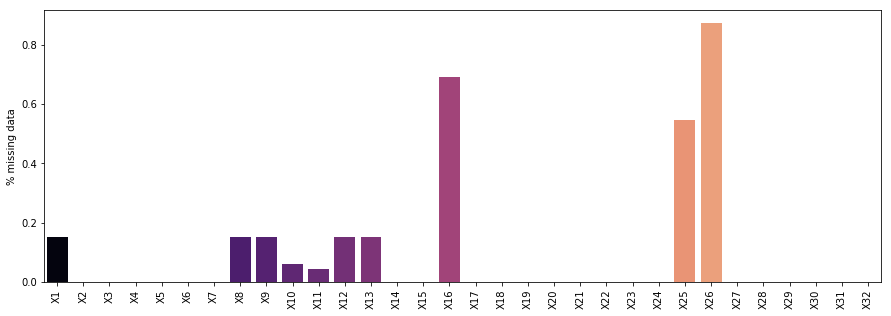

In [6]:
nvals = raw_data.isnull().sum()/raw_data.isnull().count()

plt.figure(figsize=(15,5))

sns.barplot(x = np.arange(len(nvals)), y =nvals, palette="magma")

plt.xticks(np.arange(len(nvals)),nvals.index,rotation=90)
plt.ylabel('% missing data')

# Data Cleaning & Feature Engineering

In [7]:
#step 1: remove columns X2,X3,X10,X19,X20

trial_data = pd.DataFrame(raw_data.copy())
trial_data = trial_data.drop(columns = ['X2','X3','X10','X19','X20'])

In [8]:
#Step 2: drop the observations with NA in the X1 col
trial_data = trial_data.dropna(subset=['X1'])

In [9]:
trial_data.isnull().sum()

X1          0
X4          1
X5          1
X6          1
X7          1
X8      51867
X9      51867
X11     14795
X12     51960
X13     51752
X14         1
X15         1
X16    233934
X17         1
X18        17
X21         1
X22         1
X23         1
X24         1
X25    185457
X26    295590
X27         1
X28         1
X29         1
X30       225
X31         1
X32         1
dtype: int64

In [10]:
#step 3: attempt to give meaning to X25 and X26's NaN values

#want to group the length of time since last default into 4 groups, and if no default(NaN), put into a 5th group

def default_class(df):
    if df['X25'] in range(0,12):
        return "1"
    elif df['X25']in range(12,24):
        return "2"
    elif df['X25'] in range(24,36):
        return "3"
    elif df['X25']>=36:
        return "4"
    elif df['X25']:
        return "5"

    
#puts into groups of 0-1year since last default, 1-2years since last default, 2-3years since last default , >3years since last default, and never had a default
#puts the new data into a newly created column called "default class"

In [11]:
trial_data['default_class'] = trial_data.apply(default_class, axis = 'columns')

In [12]:
trial_data.shape

(338990, 28)

In [13]:
#repeat for column X26

def public_record_class(df):
    if df['X26'] in range(0,12):
        return "1"
    elif df['X26']in range(12,24):
        return "2"
    elif df['X26'] in range(24,36):
        return "3"
    elif df['X26']>=36:
        return "4"
    elif df['X26']:
        return "5"

In [14]:
trial_data['public_record_class'] = trial_data.apply(public_record_class, axis = 'columns')



In [15]:
trial_data.head(50)

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,...,X25,X26,X27,X28,X29,X30,X31,X32,default_class,public_record_class
0,11.89%,"$25,000","$25,000","$19,080",36 months,B,B4,< 1 year,RENT,85000.0,...,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f,5,5
1,10.71%,"$7,000","$7,000",$673,36 months,B,B5,< 1 year,RENT,65000.0,...,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f,5,5
2,16.99%,"$25,000","$25,000","$24,725",36 months,D,D3,1 year,RENT,70000.0,...,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f,4,5
3,13.11%,"$1,200","$1,200","$1,200",36 months,C,C2,10+ years,OWN,54000.0,...,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f,4,5
4,13.57%,"$10,800","$10,800","$10,692",36 months,C,C3,6 years,RENT,32000.0,...,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f,4,5
5,19.05%,"$7,200","$7,200","$7,200",36 months,D,D4,9 years,RENT,58000.0,...,26.0,NaN,6.0,0.0,3874.0,90.10%,25.0,f,3,5
6,10.08%,"$7,500","$5,025",$557,36 months,B,B3,3 years,RENT,85000.0,...,NaN,NaN,3.0,0.0,33667.0,73.20%,11.0,f,5,5
7,14.26%,"$3,000","$3,000","$2,988",36 months,C,C5,3 years,MORTGAGE,80800.0,...,13.0,0.0,13.0,0.0,4740.0,39.50%,23.0,f,2,1
8,7.88%,"$4,000","$4,000","$3,900",36 months,A,A5,< 1 year,MORTGAGE,148000.0,...,NaN,NaN,11.0,0.0,50807.0,51%,19.0,f,5,5
9,14.96%,"$5,600","$5,600","$5,525",36 months,D,D2,1 year,RENT,45000.0,...,38.0,63.0,5.0,1.0,3839.0,76.80%,9.0,f,4,4


In [16]:
trial_data.shape

(338990, 29)

In [17]:
#creating copy of data in case i need it to experiment
copy_of_trial = trial_data.copy()

In [18]:
#going to drop X25 and X26 because I now have columns that better represent this data

trial_data = trial_data.drop(columns = ['X25','X26'])



In [19]:
trial_data.head()

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,...,X23,X24,X27,X28,X29,X30,X31,X32,default_class,public_record_class
0,11.89%,"$25,000","$25,000","$19,080",36 months,B,B4,< 1 year,RENT,85000.0,...,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f,5,5
1,10.71%,"$7,000","$7,000",$673,36 months,B,B5,< 1 year,RENT,65000.0,...,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f,5,5
2,16.99%,"$25,000","$25,000","$24,725",36 months,D,D3,1 year,RENT,70000.0,...,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f,4,5
3,13.11%,"$1,200","$1,200","$1,200",36 months,C,C2,10+ years,OWN,54000.0,...,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f,4,5
4,13.57%,"$10,800","$10,800","$10,692",36 months,C,C3,6 years,RENT,32000.0,...,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f,4,5


In [20]:
# Step 4: change X7 into 36 months = 0, 60 months = 1
trial_data.X7 = trial_data.X7.astype('category')

In [21]:
trial_data['X7_cat'] = trial_data.X7.cat.codes 

In [22]:
trial_data.head()

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,...,X24,X27,X28,X29,X30,X31,X32,default_class,public_record_class,X7_cat
0,11.89%,"$25,000","$25,000","$19,080",36 months,B,B4,< 1 year,RENT,85000.0,...,0.0,10.0,0.0,28854.0,52.10%,42.0,f,5,5,0
1,10.71%,"$7,000","$7,000",$673,36 months,B,B5,< 1 year,RENT,65000.0,...,0.0,7.0,0.0,33623.0,76.70%,7.0,f,5,5,0
2,16.99%,"$25,000","$25,000","$24,725",36 months,D,D3,1 year,RENT,70000.0,...,0.0,10.0,0.0,19878.0,66.30%,17.0,f,4,5,0
3,13.11%,"$1,200","$1,200","$1,200",36 months,C,C2,10+ years,OWN,54000.0,...,0.0,5.0,0.0,2584.0,40.40%,31.0,f,4,5,0
4,13.57%,"$10,800","$10,800","$10,692",36 months,C,C3,6 years,RENT,32000.0,...,1.0,14.0,0.0,3511.0,25.60%,40.0,f,4,5,0


In [23]:
trial_data.X7.value_counts()

 36 months    247791
 60 months     91198
Name: X7, dtype: int64

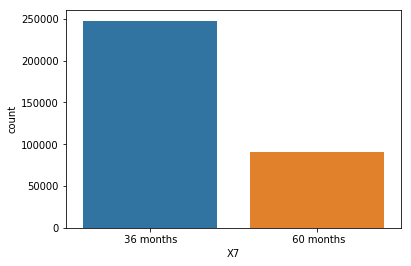

In [24]:
c= trial_data.X7
sns.countplot(c)

In [25]:
trial_data = trial_data.drop(columns = 'X7')

In [26]:
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X24,X27,X28,X29,X30,X31,X32,default_class,public_record_class,X7_cat
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,0.0,10.0,0.0,28854.0,52.10%,42.0,f,5,5,0
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,0.0,7.0,0.0,33623.0,76.70%,7.0,f,5,5,0
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,0.0,10.0,0.0,19878.0,66.30%,17.0,f,4,5,0
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,0.0,5.0,0.0,2584.0,40.40%,31.0,f,4,5,0
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,1.0,14.0,0.0,3511.0,25.60%,40.0,f,4,5,0


In [27]:
# Step 5: get dummy cols for values in X12


dummy = pd.get_dummies(trial_data, columns = ['X12'])



In [28]:
dummy.head()

,X1,X4,X5,X6,X8,X9,X11,X13,X14,X15,...,X32,default_class,public_record_class,X7_cat,X12_ANY,X12_MORTGAGE,X12_NONE,X12_OTHER,X12_OWN,X12_RENT
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,85000.0,VERIFIED - income,Aug-09,...,f,5,5,0,0,0,0,0,0,1
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,65000.0,not verified,May-08,...,f,5,5,0,0,0,0,0,0,1
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,70000.0,VERIFIED - income,Aug-14,...,f,4,5,0,0,0,0,0,0,1
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,54000.0,not verified,Mar-10,...,f,4,5,0,0,0,0,0,1,0
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,32000.0,not verified,Nov-09,...,f,4,5,0,0,0,0,0,0,1


In [29]:
dummy_select=dummy.iloc[: , 26:32]

In [30]:
dummy_select.head()

,X12_ANY,X12_MORTGAGE,X12_NONE,X12_OTHER,X12_OWN,X12_RENT
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [31]:
trial_data = pd.concat([trial_data, dummy_select],axis=1)
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X32,default_class,public_record_class,X7_cat,X12_ANY,X12_MORTGAGE,X12_NONE,X12_OTHER,X12_OWN,X12_RENT
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,f,5,5,0,0,0,0,0,0,1
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,f,5,5,0,0,0,0,0,0,1
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,f,4,5,0,0,0,0,0,0,1
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,f,4,5,0,0,0,0,0,1,0
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,f,4,5,0,0,0,0,0,0,1


In [32]:
alt_copy = trial_data.copy()

In [33]:
trial_data.shape

(338990, 33)

In [34]:
trial_data.isnull().sum()

X1                          0
X4                          1
X5                          1
X6                          1
X8                      51867
X9                      51867
X11                     14795
X12                     51960
X13                     51752
X14                         1
X15                         1
X16                    233934
X17                         1
X18                        17
X21                         1
X22                         1
X23                         1
X24                         1
X27                         1
X28                         1
X29                         1
X30                       225
X31                         1
X32                         1
default_class               0
public_record_class         0
X7_cat                      0
X12_ANY                     0
X12_MORTGAGE                0
X12_NONE                    0
X12_OTHER                   0
X12_OWN                     0
X12_RENT                    0
dtype: int

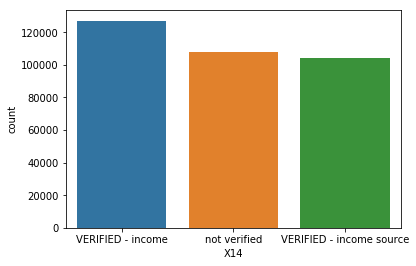

In [35]:
b=trial_data.X14
sns.countplot(b)

In [36]:
copy_of_trial['X14'].value_counts()

VERIFIED - income           127040
not verified                107873
VERIFIED - income source    104076
Name: X14, dtype: int64

In [37]:
#Step 6: repeat same proces with X14

dummy2 = pd.get_dummies(trial_data, columns = ['X14'])
dummy2.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X15,...,X7_cat,X12_ANY,X12_MORTGAGE,X12_NONE,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,Aug-09,...,0,0,0,0,0,0,1,1,0,0
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,May-08,...,0,0,0,0,0,0,1,0,0,1
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,Aug-14,...,0,0,0,0,0,0,1,1,0,0
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,Mar-10,...,0,0,0,0,0,1,0,0,0,1
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,Nov-09,...,0,0,0,0,0,0,1,0,0,1


In [38]:
dummy2_select = dummy2.iloc[: , 32:35]
dummy2_select.head()

,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [39]:
trial_data = pd.concat([trial_data, dummy2_select],axis=1)
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X7_cat,X12_ANY,X12_MORTGAGE,X12_NONE,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,0,0,0,0,0,0,1,1,0,0
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,0,0,0,0,0,0,1,0,0,1
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,0,0,0,0,0,0,1,1,0,0
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,0,0,0,0,0,1,0,0,0,1
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,0,0,0,0,0,0,1,0,0,1


In [40]:
#Step 7:get just the year from column X15

copy_of_trial['X15_yr']=copy_of_trial['X15'].str[4:]

In [41]:
copy_of_trial.head(20)

,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,...,X26,X27,X28,X29,X30,X31,X32,default_class,public_record_class,X15_yr
0,11.89%,"$25,000","$25,000","$19,080",36 months,B,B4,< 1 year,RENT,85000.0,...,NaN,10.0,0.0,28854.0,52.10%,42.0,f,5,5,09
1,10.71%,"$7,000","$7,000",$673,36 months,B,B5,< 1 year,RENT,65000.0,...,NaN,7.0,0.0,33623.0,76.70%,7.0,f,5,5,08
2,16.99%,"$25,000","$25,000","$24,725",36 months,D,D3,1 year,RENT,70000.0,...,NaN,10.0,0.0,19878.0,66.30%,17.0,f,4,5,14
3,13.11%,"$1,200","$1,200","$1,200",36 months,C,C2,10+ years,OWN,54000.0,...,NaN,5.0,0.0,2584.0,40.40%,31.0,f,4,5,10
4,13.57%,"$10,800","$10,800","$10,692",36 months,C,C3,6 years,RENT,32000.0,...,NaN,14.0,0.0,3511.0,25.60%,40.0,f,4,5,09
5,19.05%,"$7,200","$7,200","$7,200",36 months,D,D4,9 years,RENT,58000.0,...,NaN,6.0,0.0,3874.0,90.10%,25.0,f,3,5,12
6,10.08%,"$7,500","$5,025",$557,36 months,B,B3,3 years,RENT,85000.0,...,NaN,3.0,0.0,33667.0,73.20%,11.0,f,5,5,08
7,14.26%,"$3,000","$3,000","$2,988",36 months,C,C5,3 years,MORTGAGE,80800.0,...,0.0,13.0,0.0,4740.0,39.50%,23.0,f,2,1,09
8,7.88%,"$4,000","$4,000","$3,900",36 months,A,A5,< 1 year,MORTGAGE,148000.0,...,NaN,11.0,0.0,50807.0,51%,19.0,f,5,5,10
9,14.96%,"$5,600","$5,600","$5,525",36 months,D,D2,1 year,RENT,45000.0,...,63.0,5.0,1.0,3839.0,76.80%,9.0,f,4,4,10


In [42]:
copy_of_trial= copy_of_trial['X15_yr']

In [43]:
trial_data = pd.concat([trial_data, copy_of_trial],axis=1)
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X12_ANY,X12_MORTGAGE,X12_NONE,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,0,0,0,0,0,1,1,0,0,09
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,0,0,0,0,0,1,0,0,1,08
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,0,0,0,0,0,1,1,0,0,14
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,0,0,0,0,1,0,0,0,1,10
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,0,0,0,0,0,1,0,0,1,09


In [44]:
#now drop X15 because it's better represented

trial_data = trial_data.drop(columns = ['X15'])

In [45]:
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X12_ANY,X12_MORTGAGE,X12_NONE,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,0,0,0,0,0,1,1,0,0,09
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,0,0,0,0,0,1,0,0,1,08
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,0,0,0,0,0,1,1,0,0,14
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,0,0,0,0,1,0,0,0,1,10
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,0,0,0,0,0,1,0,0,1,09


In [46]:
trial_data.shape

(338990, 36)

In [47]:
trial_data.X23.head()

0    Feb-94
1    Oct-00
2    Jun-00
3    Jan-85
4    Dec-96
Name: X23, dtype: object

In [48]:
#create another copy

alternate_copy = trial_data.copy()

In [49]:
#Step 8: repeat the X15 process for X23

alternate_copy['X23_yr']=alternate_copy['X23'].str[4:]

In [50]:
alternate_copy.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X12_MORTGAGE,X12_NONE,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,0,0,0,0,1,1,0,0,09,94
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,0,0,0,0,1,0,0,1,08,00
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,0,0,0,0,1,1,0,0,14,00
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,0,0,0,1,0,0,0,1,10,85
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,0,0,0,0,1,0,0,1,09,96


In [51]:
alternate_copy = alternate_copy['X23_yr']

In [52]:
alternate_copy.head()

0    94
1    00
2    00
3    85
4    96
Name: X23_yr, dtype: object

In [53]:
trial_data = pd.concat([trial_data, alternate_copy],axis=1)

In [54]:
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X12_MORTGAGE,X12_NONE,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,0,0,0,0,1,1,0,0,09,94
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,0,0,0,0,1,0,0,1,08,00
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,0,0,0,0,1,1,0,0,14,00
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,0,0,0,1,0,0,0,1,10,85
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,0,0,0,0,1,0,0,1,09,96


In [55]:
#create another copy

additional_copy = trial_data.copy()

In [56]:
trial_data.shape

(338990, 37)

In [57]:
trial_data.isnull().sum()

X1                                   0
X4                                   1
X5                                   1
X6                                   1
X8                               51867
X9                               51867
X11                              14795
X12                              51960
X13                              51752
X14                                  1
X16                             233934
X17                                  1
X18                                 17
X21                                  1
X22                                  1
X23                                  1
X24                                  1
X27                                  1
X28                                  1
X29                                  1
X30                                225
X31                                  1
X32                                  1
default_class                        0
public_record_class                  0
X7_cat                   

In [58]:
#general review for trends

pd.pivot_table(additional_copy, values = ['X21','X29'], index = ['X1'], aggfunc = 'mean')






,X21,X29
X1,,
10.00%,14.235673,12944.870192
10.01%,9.248571,8331.000000
10.08%,11.433750,13035.354167
10.14%,12.125000,7591.700000
10.15%,17.049402,16624.473035
10.16%,16.499685,17012.687140
10.20%,9.071667,12310.833333
10.25%,13.221148,12866.021858
10.28%,9.786316,11204.684211


try to derive meaning from X16

In [59]:
values = raw_data.X16.dropna()
comments = values

In [60]:
comments

0         Due to a lack of personal finance education an...
1         Just want to pay off the last bit of credit ca...
2         Trying to pay a friend back for apartment brok...
3         If funded, I would use this loan consolidate t...
4         I currently have a personal loan with Citifina...
                                ...                        
277063      Borrower added on 03/18/14 > Purchased a pro...
277068      Borrower added on 03/18/14 > Kitchen and fro...
277069      Borrower added on 03/18/14 > To pay off all ...
277073      Borrower added on 03/18/14 > i have two loan...
277075      Borrower added on 03/18/14 > Consolidating d...
Name: X16, Length: 123560, dtype: object

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features = 1000000)

tfidf=tfidf_vectorizer.fit_transform(comments)


Below code took too long, moving forward with assumption of 6 clusters

In [62]:
#from sklearn.cluster import KMeans
#wcss = []

#for i in range(1, 11):
   # kmeans = KMeans(n_clusters = i, init = 'k-means++',
               #     max_iter = 400, n_init = 10, random_state = 0)
   # kmeans.fit(tfidf)
   # wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
#plt.plot(range(1, 11), wcss)
#plt.title('Elbow Method')
#plt.xlabel('Association')
#plt.ylabel('WCSS') #within cluster sum of squares
#plt.show()

In [63]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

#begin process of bringing dims down & clustering

svd = TruncatedSVD(n_components=50)

kmeans = KMeans(n_clusters = 6)

pipeline = make_pipeline(svd, kmeans)




In [64]:
#put my tfidf data into this

pipeline.fit(tfidf)

Pipeline(memory=None,
         steps=[('truncatedsvd',
                 TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
                              random_state=None, tol=0.0)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=6, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [65]:
labels = pipeline.predict(tfidf)

In [66]:
labels

array([2, 2, 5, ..., 0, 5, 0], dtype=int32)

In [67]:
df = pd.DataFrame({'label': labels})



In [68]:
df

,label
0,2
1,2
2,5
3,2
4,4
5,2
6,2
7,2
8,2
9,2


In [69]:
trial_data = pd.concat([trial_data, df],axis=1)

In [70]:
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X12_NONE,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,09,94,2.0
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,08,00,2.0
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,14,00,5.0
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10,85,2.0
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,09,96,4.0


In [71]:
trial_data = trial_data.drop(columns = 'X16')

In [72]:
trial_data.shape

(357788, 37)

In [73]:
trial_data.label.value_counts()

2.0    43911
5.0    34364
3.0    18190
4.0    11794
0.0     8207
1.0     7094
Name: label, dtype: int64

repeating tdidf process for X18

In [74]:


valuesb = raw_data.X18.dropna()
commentsb = valuesb


In [75]:
commentsb.shape

(399981,)

In [76]:
commentsb

0         Debt consolidation for on-time payer
1                           Credit Card payoff
2                                         mlue
3                                        zxcvb
4                                Nicolechr1978
                          ...                 
399995                 Credit card refinancing
399996                      Debt consolidation
399997                 Credit card refinancing
399998                      Debt consolidation
399999                      Debt consolidation
Name: X18, Length: 399981, dtype: object

In [77]:


tfidfb=tfidf_vectorizer.fit_transform(commentsb)

In [78]:
pipeline.fit(tfidfb)



Pipeline(memory=None,
         steps=[('truncatedsvd',
                 TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
                              random_state=None, tol=0.0)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=6, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [79]:
labelsb = pipeline.predict(tfidfb)

In [80]:
df2 = pd.DataFrame({'label_X18': labelsb})



In [81]:
df2

,label_X18
0,3
1,5
2,3
3,3
4,3
5,3
6,3
7,3
8,3
9,3


In [82]:
trial_data = pd.concat([trial_data, df2],axis=1)

In [83]:
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label,label_X18
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,0.0,0.0,1.0,1.0,0.0,0.0,09,94,2.0,3.0
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,0.0,0.0,1.0,0.0,0.0,1.0,08,00,2.0,5.0
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,0.0,0.0,1.0,1.0,0.0,0.0,14,00,5.0,3.0
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,0.0,1.0,0.0,0.0,0.0,1.0,10,85,2.0,3.0
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,0.0,0.0,1.0,0.0,0.0,1.0,09,96,4.0,3.0


In [84]:
trial_data.shape

(399999, 38)

In [85]:
trial_data = trial_data.dropna(subset = ['X4'])

In [86]:
trial_data.shape

(338989, 38)

In [87]:
trial_data = trial_data.drop(columns = 'X18')

In [88]:
trial_data = trial_data.rename(columns = {"label": "label_X16"})

In [89]:
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label_X16,label_X18
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,RENT,85000.0,VERIFIED - income,...,0.0,0.0,1.0,1.0,0.0,0.0,09,94,2.0,3.0
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,RENT,65000.0,not verified,...,0.0,0.0,1.0,0.0,0.0,1.0,08,00,2.0,5.0
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,RENT,70000.0,VERIFIED - income,...,0.0,0.0,1.0,1.0,0.0,0.0,14,00,5.0,3.0
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,OWN,54000.0,not verified,...,0.0,1.0,0.0,0.0,0.0,1.0,10,85,2.0,3.0
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,RENT,32000.0,not verified,...,0.0,0.0,1.0,0.0,0.0,1.0,09,96,4.0,3.0


In [90]:
trial_data = trial_data.drop(columns = ['X12','X14'])

In [91]:
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X13,X17,X21,...,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label_X16,label_X18
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,85000.0,debt_consolidation,19.48,...,0.0,0.0,1.0,1.0,0.0,0.0,09,94,2.0,3.0
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,65000.0,credit_card,14.29,...,0.0,0.0,1.0,0.0,0.0,1.0,08,00,2.0,5.0
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,70000.0,debt_consolidation,10.50,...,0.0,0.0,1.0,1.0,0.0,0.0,14,00,5.0,3.0
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,54000.0,debt_consolidation,5.47,...,0.0,1.0,0.0,0.0,0.0,1.0,10,85,2.0,3.0
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,32000.0,debt_consolidation,11.63,...,0.0,0.0,1.0,0.0,0.0,1.0,09,96,4.0,3.0


In [92]:
trial_data.shape

(338989, 35)

In [93]:
# Step 9: examine X17 and determine weather to put into category codes or dummy variables


In [94]:
trial_data.X17.value_counts()

debt_consolidation    198226
credit_card            75680
home_improvement       19625
other                  17154
major_purchase          7312
small_business          5359
car                     4115
medical                 3329
moving                  2138
wedding                 1934
vacation                1848
house                   1723
educational              279
renewable_energy         267
Name: X17, dtype: int64

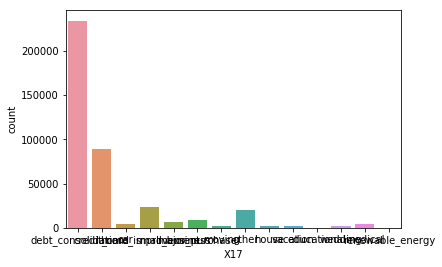

In [95]:
figsize=(16,10)
sns.countplot(x = 'X17',data = raw_data)

In [96]:
#Exploring the purpose vs loan subgrade

purp_int= ['X17', 'X9']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(trial_data[purp_int[0]], trial_data[purp_int[1]]).style.background_gradient(cmap = cm)

X9,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
X17,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
car,225,196,167,237,222,227,198,282,207,183,166,169,151,137,129,95,98,85,71,65,39,47,24,16,12,17,11,10,8,8,5,0,3,0,0
credit_card,1891,2083,2308,3587,3890,4435,4826,5492,4972,3784,3784,3692,3268,2925,2580,2034,1690,1365,1228,937,696,603,478,409,293,212,178,140,96,75,57,40,23,27,9
debt_consolidation,2977,2843,3700,5928,6991,7697,9538,11779,11237,9187,9820,9956,9574,9297,8728,7417,6559,5518,5221,4299,3418,3250,2690,2261,1845,1480,1107,983,781,619,366,292,213,134,110
educational,0,5,13,24,20,15,19,11,16,18,19,18,22,3,7,7,3,7,5,0,3,0,1,1,3,0,3,1,0,0,0,0,0,0,0
home_improvement,618,531,535,728,815,802,924,1106,1054,813,910,910,916,845,742,611,566,504,460,394,320,296,227,222,184,133,94,93,89,48,55,40,21,18,12
house,51,42,45,48,61,59,68,88,81,40,63,69,59,40,62,68,49,47,36,33,35,48,30,33,29,27,24,24,31,17,12,9,9,6,9
major_purchase,321,307,285,349,327,342,347,396,388,311,308,326,260,276,221,201,195,174,153,140,93,107,64,56,49,56,38,34,20,12,10,11,7,4,3
medical,62,56,67,79,80,82,107,122,125,129,142,129,138,112,132,133,151,148,128,108,91,87,72,67,62,43,34,44,21,15,16,5,12,2,6
moving,22,38,47,55,42,52,61,73,73,57,68,64,57,70,82,79,84,88,93,109,51,66,64,59,65,56,28,32,25,11,12,9,4,4,6


In [97]:
additional_copy.shape

(338990, 37)

In [98]:
trial_data.X17= trial_data.X17.astype('category')
trial_data['X17_cat']=trial_data.X17.cat.codes

In [99]:
trial_data.X17_cat.value_counts()

2     198226
1      75680
4      19625
9      17154
6       7312
11      5359
0       4115
7       3329
8       2138
13      1934
12      1848
5       1723
3        279
10       267
Name: X17_cat, dtype: int64

In [100]:
trial_data.X17.head()

0    debt_consolidation
1           credit_card
2    debt_consolidation
3    debt_consolidation
4    debt_consolidation
Name: X17, dtype: category
Categories (14, object): [car, credit_card, debt_consolidation, educational, ..., renewable_energy, small_business, vacation, wedding]

In [101]:
#drop X17 because have better column for it now

trial_data = trial_data.drop(columns = 'X17')

In [102]:
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X13,X21,X22,...,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label_X16,label_X18,X17_cat
0,11.89%,"$25,000","$25,000","$19,080",B,B4,< 1 year,85000.0,19.48,0.0,...,0.0,1.0,1.0,0.0,0.0,09,94,2.0,3.0,2
1,10.71%,"$7,000","$7,000",$673,B,B5,< 1 year,65000.0,14.29,0.0,...,0.0,1.0,0.0,0.0,1.0,08,00,2.0,5.0,1
2,16.99%,"$25,000","$25,000","$24,725",D,D3,1 year,70000.0,10.50,0.0,...,0.0,1.0,1.0,0.0,0.0,14,00,5.0,3.0,2
3,13.11%,"$1,200","$1,200","$1,200",C,C2,10+ years,54000.0,5.47,0.0,...,1.0,0.0,0.0,0.0,1.0,10,85,2.0,3.0,2
4,13.57%,"$10,800","$10,800","$10,692",C,C3,6 years,32000.0,11.63,0.0,...,0.0,1.0,0.0,0.0,1.0,09,96,4.0,3.0,2


In [103]:
trial_data.shape

(338989, 35)

In [104]:
trial_data.isnull().sum()

X1                                   0
X4                                   0
X5                                   0
X6                                   0
X8                               51866
X9                               51866
X11                              14794
X13                              51751
X21                                  0
X22                                  0
X23                                  0
X24                                  0
X27                                  0
X28                                  0
X29                                  0
X30                                224
X31                                  0
X32                                  0
default_class                        0
public_record_class                  0
X7_cat                               0
X12_ANY                              0
X12_MORTGAGE                         0
X12_NONE                             0
X12_OTHER                            0
X12_OWN                  

In [105]:
#Step 11: fill missing values in X13 with the mean income of that column

trial_data.X13.fillna(trial_data.X13.mean(),inplace = True)

In [106]:
trial_data.isnull().sum()

X1                                   0
X4                                   0
X5                                   0
X6                                   0
X8                               51866
X9                               51866
X11                              14794
X13                                  0
X21                                  0
X22                                  0
X23                                  0
X24                                  0
X27                                  0
X28                                  0
X29                                  0
X30                                224
X31                                  0
X32                                  0
default_class                        0
public_record_class                  0
X7_cat                               0
X12_ANY                              0
X12_MORTGAGE                         0
X12_NONE                             0
X12_OTHER                            0
X12_OWN                  

In [107]:
## i don't think this value greatly influences any interest rate decision either, based on industry reserach
#dropping column

trial_data= trial_data.drop(columns = 'X11')


In [108]:
trial_data.isnull().sum()

X1                                   0
X4                                   0
X5                                   0
X6                                   0
X8                               51866
X9                               51866
X13                                  0
X21                                  0
X22                                  0
X23                                  0
X24                                  0
X27                                  0
X28                                  0
X29                                  0
X30                                224
X31                                  0
X32                                  0
default_class                        0
public_record_class                  0
X7_cat                               0
X12_ANY                              0
X12_MORTGAGE                         0
X12_NONE                             0
X12_OTHER                            0
X12_OWN                              0
X12_RENT                 

In [109]:
x = trial_data.loc[:, ['default_class', 'public_record_class','X7_cat']].values



In [110]:
k_means_a = KMeans(n_clusters = 6,n_init=10)
k_means_a.fit(x)
y_pred_a = k_means_a.predict(x)

In [111]:
y_pred_a = pd.DataFrame(y_pred_a)
y_pred_a.head()

,0
0,2
1,2
2,5
3,5
4,5


In [112]:
kmeans_data = pd.concat([trial_data, y_pred_a],axis=1)

In [113]:
kmeans_data = kmeans_data.rename(columns = {0: 'clusters'})

In [114]:
kmeans_data.X30 =kmeans_data.X30.str.replace('%','')


kmeans_data.X30 =kmeans_data.X30.astype(float)

In [115]:
kmeans_data.groupby(by = 'clusters')['X30'].mean()

clusters
0.0    56.642546
1.0    56.418491
2.0    56.342323
3.0    56.538955
4.0    56.714270
5.0    56.602251
Name: X30, dtype: float64

In [116]:
#realilzed that each of the mean value of the clusters are very very similar, taking the middle value of these 

trial_data.X30.fillna(56.5, inplace = True)

In [117]:
final_copy = trial_data.copy()

In [118]:
# i'm dropping label_X16 for now because of the significant NA values, the copy created above can help me use label X16 if i need to in the future

final_copy = final_copy.drop(columns = ['label_X16'])


In [119]:
final_copy.isnull().sum()

X1                                  0
X4                                  0
X5                                  0
X6                                  0
X8                              51866
X9                              51866
X13                                 0
X21                                 0
X22                                 0
X23                                 0
X24                                 0
X27                                 0
X28                                 0
X29                                 0
X30                                 0
X31                                 0
X32                                 0
default_class                       0
public_record_class                 0
X7_cat                              0
X12_ANY                             0
X12_MORTGAGE                        0
X12_NONE                            0
X12_OTHER                           0
X12_OWN                             0
X12_RENT                            0
X14_VERIFIED

In [120]:
#alternate2 copy

alternate2_copy = trial_data.copy()

In [121]:
alternate2_copy.isnull().sum()

X1                                   0
X4                                   0
X5                                   0
X6                                   0
X8                               51866
X9                               51866
X13                                  0
X21                                  0
X22                                  0
X23                                  0
X24                                  0
X27                                  0
X28                                  0
X29                                  0
X30                                  0
X31                                  0
X32                                  0
default_class                        0
public_record_class                  0
X7_cat                               0
X12_ANY                              0
X12_MORTGAGE                         0
X12_NONE                             0
X12_OTHER                            0
X12_OWN                              0
X12_RENT                 

In [122]:
alternate2_copy = alternate2_copy.drop(columns = ['label_X16'])

In [123]:
alternate2_copy.isnull().sum()

X1                                  0
X4                                  0
X5                                  0
X6                                  0
X8                              51866
X9                              51866
X13                                 0
X21                                 0
X22                                 0
X23                                 0
X24                                 0
X27                                 0
X28                                 0
X29                                 0
X30                                 0
X31                                 0
X32                                 0
default_class                       0
public_record_class                 0
X7_cat                              0
X12_ANY                             0
X12_MORTGAGE                        0
X12_NONE                            0
X12_OTHER                           0
X12_OWN                             0
X12_RENT                            0
X14_VERIFIED

In [124]:
#Step 12: going to remove the remaining instances which contain null values in this dataset


alternate2_copy = alternate2_copy.dropna(subset=['X1'])

In [125]:
alternate2_copy.shape

(338989, 33)

In [126]:
alternate2_copy.isnull().sum()

X1                                  0
X4                                  0
X5                                  0
X6                                  0
X8                              51866
X9                              51866
X13                                 0
X21                                 0
X22                                 0
X23                                 0
X24                                 0
X27                                 0
X28                                 0
X29                                 0
X30                                 0
X31                                 0
X32                                 0
default_class                       0
public_record_class                 0
X7_cat                              0
X12_ANY                             0
X12_MORTGAGE                        0
X12_NONE                            0
X12_OTHER                           0
X12_OWN                             0
X12_RENT                            0
X14_VERIFIED

In [127]:
alternate2_copy = alternate2_copy.dropna(subset=['X8','X9'])

In [128]:
alternate2_copy.isnull().sum()

X1                               0
X4                               0
X5                               0
X6                               0
X8                               0
X9                               0
X13                              0
X21                              0
X22                              0
X23                              0
X24                              0
X27                              0
X28                              0
X29                              0
X30                              0
X31                              0
X32                              0
default_class                    0
public_record_class              0
X7_cat                           0
X12_ANY                          0
X12_MORTGAGE                     0
X12_NONE                         0
X12_OTHER                        0
X12_OWN                          0
X12_RENT                         0
X14_VERIFIED - income            0
X14_VERIFIED - income source     0
X14_not verified    

In [129]:
#created col with more valuable information than x23
alternate2_copy = alternate2_copy.drop(columns = 'X23')

In [130]:
#dropping remaining NA values 
alternate2_copy = alternate2_copy.dropna(axis = 0)

In [131]:

alternate2_copy.head()


,X1,X4,X5,X6,X8,X9,X13,X21,X22,X24,...,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label_X18,X17_cat
0,11.89%,"$25,000","$25,000","$19,080",B,B4,85000.0,19.48,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,09,94,3.0,2
1,10.71%,"$7,000","$7,000",$673,B,B5,65000.0,14.29,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,08,00,5.0,1
2,16.99%,"$25,000","$25,000","$24,725",D,D3,70000.0,10.50,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,14,00,3.0,2
3,13.11%,"$1,200","$1,200","$1,200",C,C2,54000.0,5.47,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,10,85,3.0,2
4,13.57%,"$10,800","$10,800","$10,692",C,C3,32000.0,11.63,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,09,96,3.0,2


In [132]:
alternate2_copy.isnull().sum()

X1                              0
X4                              0
X5                              0
X6                              0
X8                              0
X9                              0
X13                             0
X21                             0
X22                             0
X24                             0
X27                             0
X28                             0
X29                             0
X30                             0
X31                             0
X32                             0
default_class                   0
public_record_class             0
X7_cat                          0
X12_ANY                         0
X12_MORTGAGE                    0
X12_NONE                        0
X12_OTHER                       0
X12_OWN                         0
X12_RENT                        0
X14_VERIFIED - income           0
X14_VERIFIED - income source    0
X14_not verified                0
X15_yr                          0
X23_yr        

In [133]:
alternate2_copy.shape

(287109, 32)

In [134]:
final_copy = alternate2_copy.copy()

In [135]:

print(final_copy.shape)

(287109, 32)


In [136]:
final_copy.head(20)


,X1,X4,X5,X6,X8,X9,X13,X21,X22,X24,...,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label_X18,X17_cat
0,11.89%,"$25,000","$25,000","$19,080",B,B4,85000.0,19.48,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,09,94,3.0,2
1,10.71%,"$7,000","$7,000",$673,B,B5,65000.0,14.29,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,08,00,5.0,1
2,16.99%,"$25,000","$25,000","$24,725",D,D3,70000.0,10.50,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,14,00,3.0,2
3,13.11%,"$1,200","$1,200","$1,200",C,C2,54000.0,5.47,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,10,85,3.0,2
4,13.57%,"$10,800","$10,800","$10,692",C,C3,32000.0,11.63,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,09,96,3.0,2
5,19.05%,"$7,200","$7,200","$7,200",D,D4,58000.0,2.05,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,12,94,3.0,2
6,10.08%,"$7,500","$5,025",$557,B,B3,85000.0,8.10,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,08,00,3.0,2
7,14.26%,"$3,000","$3,000","$2,988",C,C5,80800.0,14.97,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,09,98,3.0,1
8,7.88%,"$4,000","$4,000","$3,900",A,A5,148000.0,16.98,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,10,93,3.0,1
9,14.96%,"$5,600","$5,600","$5,525",D,D2,45000.0,4.00,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,10,01,3.0,2


In [137]:
#making final changes to columns with dollar signs & commans

final_copy.X4 = final_copy.X4.str.replace('$','')

In [138]:
final_copy.X4 =final_copy.X4.str.replace(',','')

In [139]:
final_copy.X4 = final_copy.X4.astype(int)

In [140]:
final_copy.X5 =final_copy.X5.str.replace(',','')
final_copy.X5 = final_copy.X5.str.replace('$','')

final_copy.X5 =final_copy.X5.astype(int)

In [141]:
final_copy.X6 =final_copy.X6.str.replace(',','')
final_copy.X6 = final_copy.X6.str.replace('$','')

final_copy.X6 =final_copy.X6.astype(int)

In [142]:
final_copy.X1 =final_copy.X1.str.replace('%','')


final_copy.X1 =final_copy.X1.astype(float)

In [143]:
final_copy.dtypes

X1                              float64
X4                                int64
X5                                int64
X6                                int64
X8                               object
X9                               object
X13                             float64
X21                             float64
X22                             float64
X24                             float64
X27                             float64
X28                             float64
X29                             float64
X30                              object
X31                             float64
X32                              object
default_class                    object
public_record_class              object
X7_cat                          float64
X12_ANY                         float64
X12_MORTGAGE                    float64
X12_NONE                        float64
X12_OTHER                       float64
X12_OWN                         float64
X12_RENT                        float64


In [144]:
final_copy.X30 =final_copy.X30.str.replace('%','')


final_copy.X30 =final_copy.X30.astype(float)

In [145]:
#dropping X32 based on complexity and it causing errors

final_copy =final_copy.drop(columns = 'X32')

In [146]:
final_copy.head(20)

,X1,X4,X5,X6,X8,X9,X13,X21,X22,X24,...,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label_X18,X17_cat
0,11.89,25000,25000,19080,B,B4,85000.0,19.48,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,09,94,3.0,2
1,10.71,7000,7000,673,B,B5,65000.0,14.29,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,08,00,5.0,1
2,16.99,25000,25000,24725,D,D3,70000.0,10.50,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,14,00,3.0,2
3,13.11,1200,1200,1200,C,C2,54000.0,5.47,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,10,85,3.0,2
4,13.57,10800,10800,10692,C,C3,32000.0,11.63,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,09,96,3.0,2
5,19.05,7200,7200,7200,D,D4,58000.0,2.05,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,12,94,3.0,2
6,10.08,7500,5025,557,B,B3,85000.0,8.10,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,08,00,3.0,2
7,14.26,3000,3000,2988,C,C5,80800.0,14.97,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,09,98,3.0,1
8,7.88,4000,4000,3900,A,A5,148000.0,16.98,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,10,93,3.0,1
9,14.96,5600,5600,5525,D,D2,45000.0,4.00,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,10,01,3.0,2


In [147]:
final_copy.X8.value_counts()

B    86119
C    76441
D    46978
A    45525
E    21627
F     8395
G     2024
Name: X8, dtype: int64

In [148]:
final_copy.X8 = final_copy.X8.astype('category')


In [149]:
final_copy['X8_cat']=final_copy.X8.cat.codes

In [150]:
final_copy.head()

,X1,X4,X5,X6,X8,X9,X13,X21,X22,X24,...,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label_X18,X17_cat,X8_cat
0,11.89,25000,25000,19080,B,B4,85000.0,19.48,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,09,94,3.0,2,1
1,10.71,7000,7000,673,B,B5,65000.0,14.29,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,08,00,5.0,1,1
2,16.99,25000,25000,24725,D,D3,70000.0,10.50,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,14,00,3.0,2,3
3,13.11,1200,1200,1200,C,C2,54000.0,5.47,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,10,85,3.0,2,2
4,13.57,10800,10800,10692,C,C3,32000.0,11.63,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,09,96,3.0,2,2


In [151]:
final_copy = final_copy.drop(columns = 'X8')

In [152]:
final_copy.head()

,X1,X4,X5,X6,X9,X13,X21,X22,X24,X27,...,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label_X18,X17_cat,X8_cat
0,11.89,25000,25000,19080,B4,85000.0,19.48,0.0,0.0,10.0,...,0.0,1.0,1.0,0.0,0.0,09,94,3.0,2,1
1,10.71,7000,7000,673,B5,65000.0,14.29,0.0,0.0,7.0,...,0.0,1.0,0.0,0.0,1.0,08,00,5.0,1,1
2,16.99,25000,25000,24725,D3,70000.0,10.50,0.0,0.0,10.0,...,0.0,1.0,1.0,0.0,0.0,14,00,3.0,2,3
3,13.11,1200,1200,1200,C2,54000.0,5.47,0.0,0.0,5.0,...,1.0,0.0,0.0,0.0,1.0,10,85,3.0,2,2
4,13.57,10800,10800,10692,C3,32000.0,11.63,0.0,1.0,14.0,...,0.0,1.0,0.0,0.0,1.0,09,96,3.0,2,2


In [153]:
#repeat for X9
final_copy.X9 = final_copy.X9.astype('category')
final_copy['X9_cat'] = final_copy.X9.cat.codes

In [154]:
final_copy.head()

,X1,X4,X5,X6,X9,X13,X21,X22,X24,X27,...,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr,X23_yr,label_X18,X17_cat,X8_cat,X9_cat
0,11.89,25000,25000,19080,B4,85000.0,19.48,0.0,0.0,10.0,...,1.0,1.0,0.0,0.0,09,94,3.0,2,1,8
1,10.71,7000,7000,673,B5,65000.0,14.29,0.0,0.0,7.0,...,1.0,0.0,0.0,1.0,08,00,5.0,1,1,9
2,16.99,25000,25000,24725,D3,70000.0,10.50,0.0,0.0,10.0,...,1.0,1.0,0.0,0.0,14,00,3.0,2,3,17
3,13.11,1200,1200,1200,C2,54000.0,5.47,0.0,0.0,5.0,...,0.0,0.0,0.0,1.0,10,85,3.0,2,2,11
4,13.57,10800,10800,10692,C3,32000.0,11.63,0.0,1.0,14.0,...,1.0,0.0,0.0,1.0,09,96,3.0,2,2,12


In [155]:
final_copy = final_copy.drop(columns = 'X9')

# Data Visualization

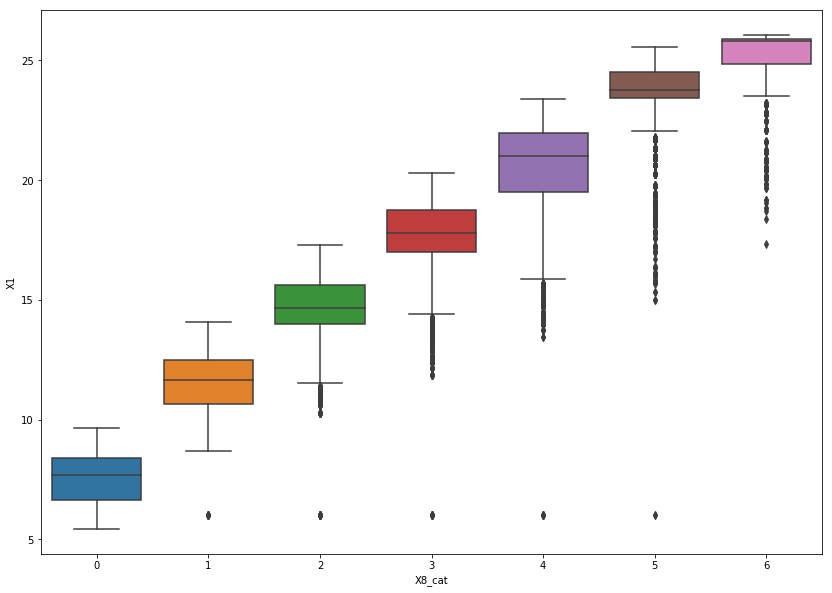

In [156]:
import seaborn as sns
fig, ax = plt.subplots(1, figsize=(14,10))
ax = sns.boxplot(x='X8_cat',y='X1', data = final_copy)

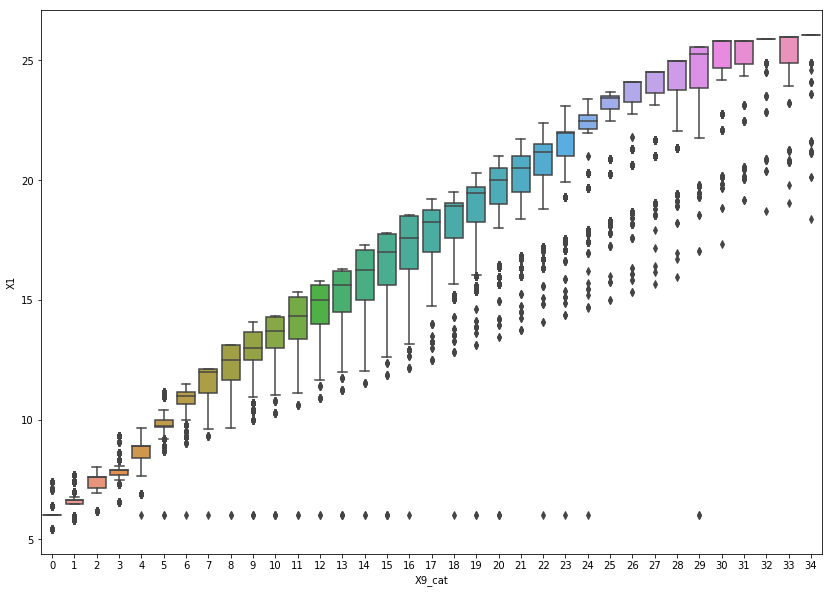

In [157]:
fig, ax = plt.subplots(1, figsize=(14,10))
ax = sns.boxplot(x='X9_cat',y='X1', data = final_copy)

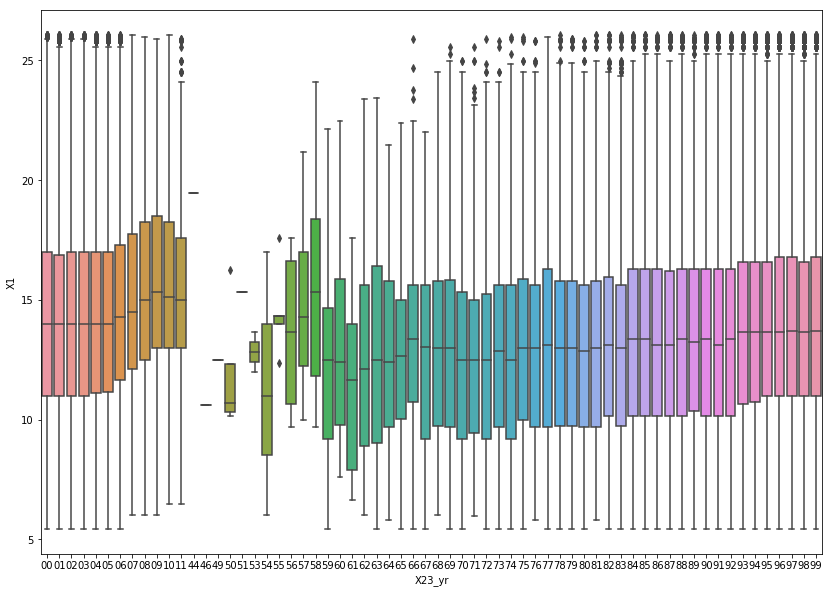

In [158]:

fig, ax = plt.subplots(1, figsize=(14,10))
ax = sns.boxplot(x='X23_yr',y='X1', data = final_copy)

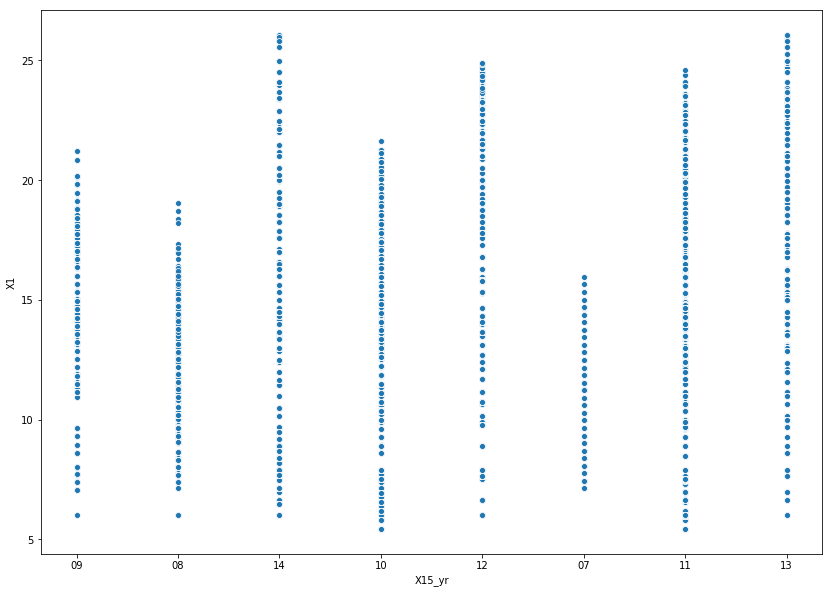

In [159]:
fig, ax = plt.subplots(1, figsize=(14,10))
sns.scatterplot(x='X15_yr',y='X1',data=final_copy)

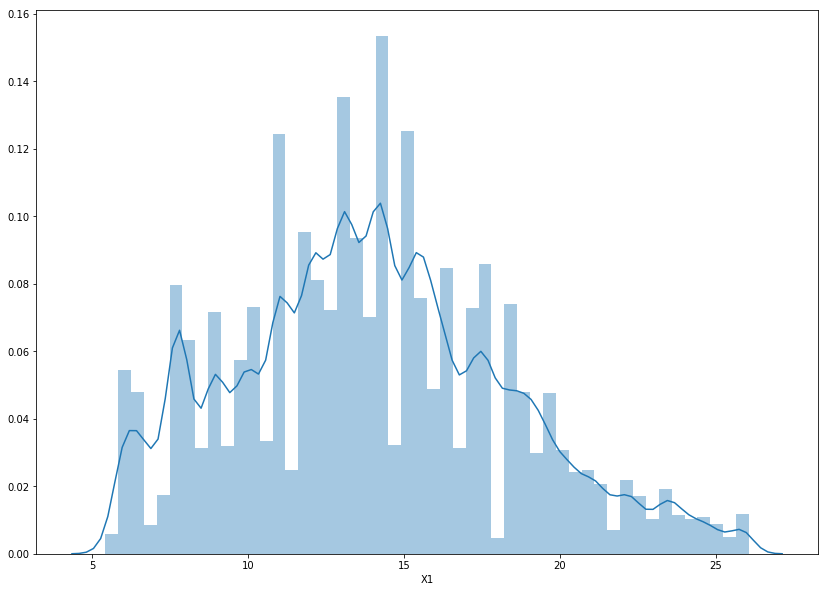

In [160]:
fig, ax = plt.subplots(1, figsize=(14,10))
a = final_copy.X1
sns.distplot(a)

In [161]:
final_copy.shape

(287109, 31)

In [162]:
copy_for_later = final_copy.copy()

In [163]:
final_copy.isnull().sum()

X1                                0
X4                                0
X5                                0
X6                                0
X13                               0
X21                               0
X22                               0
X24                               0
X27                               0
X28                               0
X29                               0
X30                             178
X31                               0
default_class                     0
public_record_class               0
X7_cat                            0
X12_ANY                           0
X12_MORTGAGE                      0
X12_NONE                          0
X12_OTHER                         0
X12_OWN                           0
X12_RENT                          0
X14_VERIFIED - income             0
X14_VERIFIED - income source      0
X14_not verified                  0
X15_yr                            0
X23_yr                            0
label_X18                   

In [164]:
final_copy.isnull().sum()

X1                                0
X4                                0
X5                                0
X6                                0
X13                               0
X21                               0
X22                               0
X24                               0
X27                               0
X28                               0
X29                               0
X30                             178
X31                               0
default_class                     0
public_record_class               0
X7_cat                            0
X12_ANY                           0
X12_MORTGAGE                      0
X12_NONE                          0
X12_OTHER                         0
X12_OWN                           0
X12_RENT                          0
X14_VERIFIED - income             0
X14_VERIFIED - income source      0
X14_not verified                  0
X15_yr                            0
X23_yr                            0
label_X18                   

In [165]:
final_copy = final_copy.drop(columns = ['X15_yr'])

In [166]:
final_copy = final_copy.drop(columns = ['X23_yr'])

In [167]:
final_copy.isnull().sum()

X1                                0
X4                                0
X5                                0
X6                                0
X13                               0
X21                               0
X22                               0
X24                               0
X27                               0
X28                               0
X29                               0
X30                             178
X31                               0
default_class                     0
public_record_class               0
X7_cat                            0
X12_ANY                           0
X12_MORTGAGE                      0
X12_NONE                          0
X12_OTHER                         0
X12_OWN                           0
X12_RENT                          0
X14_VERIFIED - income             0
X14_VERIFIED - income source      0
X14_not verified                  0
label_X18                         0
X17_cat                           0
X8_cat                      

In [168]:
final_copy = final_copy.drop(columns = ['X17_cat'])

In [169]:
final_copy = final_copy.drop(columns = ['X31','X29','X28','X27','X24'])

In [170]:
final_copy.isnull().sum()

X1                                0
X4                                0
X5                                0
X6                                0
X13                               0
X21                               0
X22                               0
X30                             178
default_class                     0
public_record_class               0
X7_cat                            0
X12_ANY                           0
X12_MORTGAGE                      0
X12_NONE                          0
X12_OTHER                         0
X12_OWN                           0
X12_RENT                          0
X14_VERIFIED - income             0
X14_VERIFIED - income source      0
X14_not verified                  0
label_X18                         0
X8_cat                            0
X9_cat                            0
dtype: int64

In [171]:
final_copy.X30.fillna(56.5, inplace = True)

In [172]:
final_copy.isnull().sum()

X1                              0
X4                              0
X5                              0
X6                              0
X13                             0
X21                             0
X22                             0
X30                             0
default_class                   0
public_record_class             0
X7_cat                          0
X12_ANY                         0
X12_MORTGAGE                    0
X12_NONE                        0
X12_OTHER                       0
X12_OWN                         0
X12_RENT                        0
X14_VERIFIED - income           0
X14_VERIFIED - income source    0
X14_not verified                0
label_X18                       0
X8_cat                          0
X9_cat                          0
dtype: int64

In [173]:
final_copy.shape

(287109, 23)

In [174]:
final_copy.head()

,X1,X4,X5,X6,X13,X21,X22,X30,default_class,public_record_class,...,X12_NONE,X12_OTHER,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,label_X18,X8_cat,X9_cat
0,11.89,25000,25000,19080,85000.0,19.48,0.0,52.1,5,5,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1,8
1,10.71,7000,7000,673,65000.0,14.29,0.0,76.7,5,5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1,9
2,16.99,25000,25000,24725,70000.0,10.50,0.0,66.3,4,5,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3,17
3,13.11,1200,1200,1200,54000.0,5.47,0.0,40.4,4,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,2,11
4,13.57,10800,10800,10692,32000.0,11.63,0.0,25.6,4,5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,2,12


# Model Building & Selection

In [175]:
y = final_copy.iloc[:,0].values
x = final_copy.iloc[:, 1:40].values


In [176]:
X = final_copy.iloc[:, 1:40]

In [177]:
x.shape

(287109, 22)

In [178]:
SEED=3

In [179]:
#going to begin with DT & RF

#preform necessary imports
import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 


In [180]:
#split data into train/test split for Cross Validation (80/20 split)
x_train, x_test, y_train, y_test= cv.train_test_split(x, y, test_size = .3, random_state = SEED)



In [181]:
#create a decision tree instance

dt = DecisionTreeRegressor(max_depth=8, 
                           min_samples_leaf= 0.13,
                           random_state = SEED)


In [182]:
#fit to the training portion of my df

dt.fit(x_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.13,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [183]:
from sklearn.metrics import mean_squared_error as MSE

# compute y_pred

y_pred = dt.predict(x_test)


# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 1.39


In [184]:
print(y_pred[0:5])

[15.09670383  8.09634121 12.4180925  12.15609604 15.09670383]


In [185]:
from sklearn.model_selection import cross_val_score
MSE_CV_Scores = -cross_val_score(dt, x_train, y_train, cv = 10,
                                scoring = 'neg_mean_squared_error',
                                n_jobs = -1)

In [186]:
RMSE_CV = (MSE_CV_Scores.mean())**(1/2)

print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 1.39


In [187]:
from sklearn.metrics import mean_squared_error as MSE

dt.fit(x_train, y_train)

y_pred_train = dt.predict(x_train)

RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 1.39


Random Forest

In [188]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


In [189]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
min_samples_leaf=0.12,
random_state=SEED)


In [190]:
# Fit 'rf' to the training set
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.12, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=3, verbose=0,
                      warm_start=False)

In [191]:
# Predict the test set labels 'y_pred'
y_pred = rf.predict(x_test)
y_pred_train=rf.predict(x_train)

In [192]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)

In [193]:
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 1.58
Train set RMSE of rf: 1.58


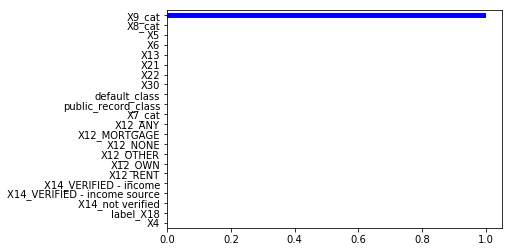

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

I don't like my scores so i'm going to drop some insignificant cols

In [195]:
ammended_copy = final_copy.drop(columns = ['X4','X22'])

In [320]:
ammended_copy.isnull().sum()

X1                              0
X5                              0
X6                              0
X13                             0
X21                             0
X30                             0
default_class                   0
public_record_class             0
X7_cat                          0
X12_ANY                         0
X12_MORTGAGE                    0
X12_NONE                        0
X12_OTHER                       0
X12_OWN                         0
X12_RENT                        0
X14_VERIFIED - income           0
X14_VERIFIED - income source    0
X14_not verified                0
label_X18                       0
X8_cat                          0
X9_cat                          0
dtype: int64

In [321]:
ammended_copy = ammended_copy.drop(columns = ['X6','X12_ANY','X12_NONE','X12_OTHER'])

Re-running some algs

In [322]:
y_new = ammended_copy.iloc[:,0].values
x_new = ammended_copy.iloc[:, 1:40].values
X_new = ammended_copy.iloc[:, 1:40]

In [323]:

(x_train, x_test, y_train, y_test)= cv.train_test_split(x_new, y_new, test_size = .25)


In [324]:

dt = DecisionTreeRegressor(max_depth=8, 
                           min_samples_leaf= 0.13,
                           random_state = SEED)


In [325]:
dt.fit(x_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.13,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [326]:
dt_y_pred = dt.predict(x_test)


# Compute mse_dt
mse_dt = MSE(y_test, dt_y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 1.39


In [327]:
MSE_CV_Scores = -cross_val_score(dt, x_train, y_train, cv = 10,
                                scoring = 'neg_mean_squared_error',
                                n_jobs = -1)

In [328]:
RMSE_CV = (MSE_CV_Scores.mean())**(1/2)

print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 1.39


In [329]:
from sklearn.metrics import mean_squared_error as MSE

dt.fit(x_train, y_train)

y_pred_train = dt.predict(x_train)

RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 1.39


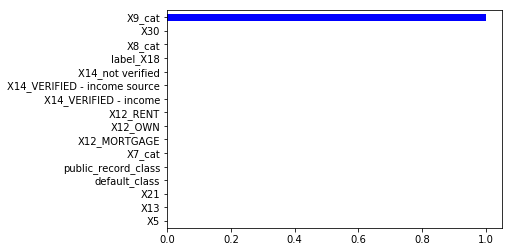

In [330]:
X = ammended_copy.iloc[:, 1:40]
importances_dt = pd.Series(dt.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_dt = importances_dt.sort_values()
# Make a horizontal bar plot
sorted_importances_dt.plot(kind='barh', color='blue')
plt.show()

run back through algorithms

Seeing what happens if i scale my predictor values

In [331]:
from sklearn.preprocessing import StandardScaler

In [332]:
scaler = StandardScaler()
scaler.fit(x_new)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [333]:
scaler.transform(x_new)

array([[ 1.30495794,  0.22776055,  0.32200149, ...,  0.91940854,
        -0.61639292, -0.46652969],
       [-0.8785607 , -0.15620107, -0.35246191, ...,  2.26993469,
        -0.61639292, -0.31331273],
       [ 1.30495794, -0.06021067, -0.84498914, ...,  0.91940854,
         0.89973199,  0.91242297],
       ...,
       [-0.75725411, -0.15620107,  0.10627717, ...,  0.24414546,
        -1.37445537, -1.38583147],
       [ 0.01607541, -0.48256845,  1.64103879, ..., -1.10638069,
         0.89973199,  1.2188569 ],
       [-1.12117389, -0.54016269, -1.3297191 , ..., -1.10638069,
        -0.61639292, -0.92618058]])

In [334]:

(train_x, test_x, train_y, test_y)= cv.train_test_split(x_new, y_new, test_size = .3, random_state = SEED)



In [335]:
dt = DecisionTreeRegressor(max_depth=4, 
                           min_samples_leaf= 1,
                           random_state = SEED)


In [336]:
dt.fit(train_x, train_y)


DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [337]:
y_pred_new = dt.predict(test_x)


# Compute mse_dt
mse_dt_new = MSE(test_y, y_pred_new)

# Compute rmse_dt
rmse_dt_new = mse_dt_new**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt_new))

Test set RMSE of dt: 0.88


In [338]:
from sklearn.model_selection import cross_val_score
MSE_CV_Scores_new = -cross_val_score(dt, train_x, train_y, cv = 10,
                                scoring = 'neg_mean_squared_error',
                                n_jobs = -1)

In [339]:
RMSE_CV_new = (MSE_CV_Scores_new.mean())**(1/2)

print('CV RMSE: {:.2f}'.format(RMSE_CV_new))

CV RMSE: 0.87


In [340]:
from sklearn.metrics import mean_squared_error as MSE

dt.fit(train_x, train_y)

y_pred_train_new = dt.predict(train_x)

RMSE_train_new = (MSE(train_y, y_pred_train_new))**(1/2)

print('Train RMSE: {:.2f}'.format(RMSE_train_new))

Train RMSE: 0.87


Linear Regression

In [341]:
linear= linear_model.LinearRegression()

In [342]:
linear.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [343]:
linear.score(train_x, train_y)

0.9556461308915424

In [344]:
predicted = linear.predict(test_x)

In [345]:
predicted

array([15.87205946,  9.79257211, 13.16972917, ..., 18.0104282 ,
       19.22823548, 18.3479413 ])

RidgeCV

In [346]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=10)

In [347]:
ridge.fit(train_x,train_y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [348]:
ridge.alpha_

10.0

In [349]:
ridge.coef_

array([-6.08069696e-07, -1.09301352e-06,  5.25340471e-03,  5.12612499e-03,
       -2.00054906e-02,  6.71045350e-02, -1.61575848e-01, -1.04899969e-02,
        1.46211726e-02, -1.33856116e-03,  1.61802552e-01, -6.86563876e-02,
       -9.31461643e-02,  3.28958029e-02,  4.41459001e-02,  6.41329888e-01])

In [350]:
y_pred_ridge = ridge.predict(test_x)

In [351]:
mse_test_ridge = MSE(test_y, y_pred_ridge)

# Compute RMSE
rmse_test_ridge = mse_test_ridge **(1/2)

# Print RMSE
print('Test set RMSE of ridge: {:.3f}'.format(rmse_test_ridge))


Test set RMSE of ridge: 0.929


Gradient Boost -- This is selected as the best model

In [352]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=400,
                               random_state=2)


In [353]:
# Fit gb to the training set
gb.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto', random_state=2,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

# Model Testing On Holdout Set

In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
raw_data = pd.read_csv("/Users/marcushimelhoch/Downloads/HoldoutforTesting.csv")


In [229]:
#step 1: remove columns X2,X3,X10,X19,X20

trial_data = pd.DataFrame(raw_data.copy())
trial_data = trial_data.drop(columns = ['X2','X3','X10','X19','X20'])

In [230]:

def default_class(df):
    if df['X25'] in range(0,12):
        return "1"
    elif df['X25']in range(12,24):
        return "2"
    elif df['X25'] in range(24,36):
        return "3"
    elif df['X25']>=36:
        return "4"
    elif df['X25']:
        return "5"

    
#puts into groups of 0-1year since last default, 1-2years since last default, 2-3years since last default , >3years since last default, and never had a default
#puts the new data into a newly created column called "default class"

In [231]:
trial_data['default_class'] = trial_data.apply(default_class, axis = 'columns')

In [232]:
trial_data.shape

(80000, 28)

In [233]:
#repeat for column X26

def public_record_class(df):
    if df['X26'] in range(0,12):
        return "1"
    elif df['X26']in range(12,24):
        return "2"
    elif df['X26'] in range(24,36):
        return "3"
    elif df['X26']>=36:
        return "4"
    elif df['X26']:
        return "5"

In [234]:
trial_data['public_record_class'] = trial_data.apply(public_record_class, axis = 'columns')


In [235]:
trial_data.head(50)


,X1,X4,X5,X6,X7,X8,X9,X11,X12,X13,...,X25,X26,X27,X28,X29,X30,X31,X32,default_class,public_record_class
0,NaN,"$6,000","$6,000","$6,000",36 months,C,C5,10+ years,MORTGAGE,68000.0,...,26.0,NaN,18,0,19861,64.50%,33,f,3,5
1,NaN,"$24,000","$24,000","$24,000",36 months,A,A1,8 years,RENT,110480.0,...,NaN,NaN,12,0,17001,26.20%,36,w,5,5
2,NaN,"$35,000","$35,000","$35,000",36 months,C,C2,10+ years,MORTGAGE,86000.0,...,NaN,NaN,16,0,25797,49.90%,33,w,5,5
3,NaN,"$10,000","$10,000","$10,000",60 months,D,D1,10+ years,RENT,30000.0,...,NaN,114.0,13,1,9586,43.80%,21,w,5,4
4,NaN,"$24,000","$24,000","$24,000",60 months,B,B1,10+ years,MORTGAGE,82500.0,...,48.0,NaN,27,0,31842,41.30%,43,w,4,5
5,NaN,"$18,000","$18,000","$18,000",60 months,B,B3,10+ years,MORTGAGE,64709.0,...,NaN,NaN,8,0,18652,64.80%,21,w,5,5
6,NaN,"$8,000","$8,000","$8,000",36 months,C,C3,8 years,RENT,30000.0,...,NaN,NaN,7,0,13775,63.20%,10,w,5,5
7,NaN,"$24,000","$24,000","$24,000",36 months,B,B2,< 1 year,RENT,72000.0,...,31.0,NaN,10,0,20417,68.70%,19,w,3,5
8,NaN,"$18,000","$18,000","$18,000",60 months,C,C4,7 years,MORTGAGE,60000.0,...,72.0,NaN,9,0,3948,66.90%,23,w,4,5
9,NaN,"$25,000","$25,000","$25,000",36 months,A,A2,10+ years,MORTGAGE,113000.0,...,21.0,NaN,12,0,12689,41.30%,25,w,2,5


In [236]:
copy_of_trial = trial_data.copy()

In [237]:

trial_data = trial_data.drop(columns = ['X25','X26'])



In [238]:
# Step 4: change X7 into 36 months = 0, 60 months = 1
trial_data.X7 = trial_data.X7.astype('category')

In [239]:
trial_data['X7_cat'] = trial_data.X7.cat.codes 

In [240]:
trial_data = trial_data.drop(columns = 'X7')

In [241]:
dummy = pd.get_dummies(trial_data, columns = ['X12'])



In [242]:
dummy_select=dummy.iloc[: , 26:35]

In [243]:
dummy_select.head()

,X12_MORTGAGE,X12_OWN,X12_RENT
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [244]:
trial_data = pd.concat([trial_data, dummy_select],axis=1)
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X29,X30,X31,X32,default_class,public_record_class,X7_cat,X12_MORTGAGE,X12_OWN,X12_RENT
0,NaN,"$6,000","$6,000","$6,000",C,C5,10+ years,MORTGAGE,68000.0,VERIFIED - income,...,19861,64.50%,33,f,3,5,0,1,0,0
1,NaN,"$24,000","$24,000","$24,000",A,A1,8 years,RENT,110480.0,VERIFIED - income,...,17001,26.20%,36,w,5,5,0,0,0,1
2,NaN,"$35,000","$35,000","$35,000",C,C2,10+ years,MORTGAGE,86000.0,VERIFIED - income,...,25797,49.90%,33,w,5,5,0,1,0,0
3,NaN,"$10,000","$10,000","$10,000",D,D1,10+ years,RENT,30000.0,VERIFIED - income source,...,9586,43.80%,21,w,5,4,1,0,0,1
4,NaN,"$24,000","$24,000","$24,000",B,B1,10+ years,MORTGAGE,82500.0,VERIFIED - income,...,31842,41.30%,43,w,4,5,1,1,0,0


In [245]:
alt_copy = trial_data.copy()

In [246]:
dummy2 = pd.get_dummies(trial_data, columns = ['X14'])
dummy2.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X15,...,X32,default_class,public_record_class,X7_cat,X12_MORTGAGE,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified
0,NaN,"$6,000","$6,000","$6,000",C,C5,10+ years,MORTGAGE,68000.0,15-Mar,...,f,3,5,0,1,0,0,1,0,0
1,NaN,"$24,000","$24,000","$24,000",A,A1,8 years,RENT,110480.0,15-Mar,...,w,5,5,0,0,0,1,1,0,0
2,NaN,"$35,000","$35,000","$35,000",C,C2,10+ years,MORTGAGE,86000.0,15-Mar,...,w,5,5,0,1,0,0,1,0,0
3,NaN,"$10,000","$10,000","$10,000",D,D1,10+ years,RENT,30000.0,15-Mar,...,w,5,4,1,0,0,1,0,1,0
4,NaN,"$24,000","$24,000","$24,000",B,B1,10+ years,MORTGAGE,82500.0,15-Mar,...,w,4,5,1,1,0,0,1,0,0


In [247]:
dummy2_select = dummy2.iloc[: , 29:35]
dummy2_select.head()

,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [248]:
trial_data = pd.concat([trial_data, dummy2_select],axis=1)
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,X32,default_class,public_record_class,X7_cat,X12_MORTGAGE,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified
0,NaN,"$6,000","$6,000","$6,000",C,C5,10+ years,MORTGAGE,68000.0,VERIFIED - income,...,f,3,5,0,1,0,0,1,0,0
1,NaN,"$24,000","$24,000","$24,000",A,A1,8 years,RENT,110480.0,VERIFIED - income,...,w,5,5,0,0,0,1,1,0,0
2,NaN,"$35,000","$35,000","$35,000",C,C2,10+ years,MORTGAGE,86000.0,VERIFIED - income,...,w,5,5,0,1,0,0,1,0,0
3,NaN,"$10,000","$10,000","$10,000",D,D1,10+ years,RENT,30000.0,VERIFIED - income source,...,w,5,4,1,0,0,1,0,1,0
4,NaN,"$24,000","$24,000","$24,000",B,B1,10+ years,MORTGAGE,82500.0,VERIFIED - income,...,w,4,5,1,1,0,0,1,0,0


In [249]:
copy_of_trial['X15_yr']=copy_of_trial['X15'].str[4:]

In [250]:
copy_of_trial= copy_of_trial['X15_yr']

In [251]:
trial_data = pd.concat([trial_data, copy_of_trial],axis=1)
trial_data.head()

,X1,X4,X5,X6,X8,X9,X11,X12,X13,X14,...,default_class,public_record_class,X7_cat,X12_MORTGAGE,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X15_yr
0,NaN,"$6,000","$6,000","$6,000",C,C5,10+ years,MORTGAGE,68000.0,VERIFIED - income,...,3,5,0,1,0,0,1,0,0,ar
1,NaN,"$24,000","$24,000","$24,000",A,A1,8 years,RENT,110480.0,VERIFIED - income,...,5,5,0,0,0,1,1,0,0,ar
2,NaN,"$35,000","$35,000","$35,000",C,C2,10+ years,MORTGAGE,86000.0,VERIFIED - income,...,5,5,0,1,0,0,1,0,0,ar
3,NaN,"$10,000","$10,000","$10,000",D,D1,10+ years,RENT,30000.0,VERIFIED - income source,...,5,4,1,0,0,1,0,1,0,ar
4,NaN,"$24,000","$24,000","$24,000",B,B1,10+ years,MORTGAGE,82500.0,VERIFIED - income,...,4,5,1,1,0,0,1,0,0,ar


In [252]:

trial_data = trial_data.drop(columns = ['X15'])

In [253]:
alternate_copy = trial_data.copy()

In [254]:
alternate_copy['X23_yr']=alternate_copy['X23'].str[4:]

In [255]:
alternate_copy = alternate_copy['X23_yr']

In [256]:
trial_data = pd.concat([trial_data, alternate_copy],axis=1)

In [257]:

additional_copy = trial_data.copy()

In [258]:
values = raw_data.X16.dropna()
comments = values

In [259]:
comments

1210                                                      
1398     loan needed to send daughter to medical school...
5943     I want to consolidate two credit cards with hi...
7559      this loan would be used to replace non deduct...
19065    I am a great candidate for this loan because I...
19700    Please and need to get $10000 to finish my deb...
24112                                                     
24979    I need funds to cover the uncovered prescripti...
33076    Would like to pay off Lowes card with a better...
43617                                                     
46207                                                     
62646    This loan will be used to consolidate high int...
65792                                                     
71345    I need a lower interest loan to pay off my cit...
78197                                                     
Name: X16, dtype: object

In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features = 1000000)

tfidf=tfidf_vectorizer.fit_transform(comments)

In [261]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

svd = TruncatedSVD(n_components=50)

kmeans = KMeans(n_clusters = 4)

pipeline = make_pipeline(svd, kmeans)



In [262]:
pipeline.fit(tfidf)

Pipeline(memory=None,
         steps=[('truncatedsvd',
                 TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
                              random_state=None, tol=0.0)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [263]:
labels = pipeline.predict(tfidf)

In [264]:
df = pd.DataFrame({'label': labels})



In [265]:
trial_data = pd.concat([trial_data, df],axis=1)

In [266]:
trial_data = trial_data.drop(columns = 'X16')

In [267]:

trial_data.X18= trial_data.X18.astype('category')
trial_data['X18_cat'] = trial_data.X18.cat.codes

In [268]:
trial_data = trial_data.dropna(subset = ['X4'])

In [269]:
trial_data = trial_data.rename(columns = {"label": "label_X16"})

In [270]:
trial_data.X17= trial_data.X17.astype('category')
trial_data['X17_cat']=trial_data.X17.cat.codes

In [271]:
trial_data = trial_data.drop(columns = 'X17')

In [272]:

trial_data.X13.fillna(trial_data.X13.mean(),inplace = True)

In [273]:
trial_data.isnull().sum()

X1                              80000
X4                                  0
X5                                  0
X6                                  0
X8                                  0
X9                                  0
X11                              4382
X12                                 0
X13                                 0
X14                                 0
X18                                 0
X21                                 0
X22                                 0
X23                                 0
X24                                 0
X27                                 0
X28                                 0
X29                                 0
X30                                30
X31                                 0
X32                                 0
default_class                       0
public_record_class                 0
X7_cat                              0
X12_MORTGAGE                        0
X12_OWN                             0
X12_RENT    

In [274]:

trial_data= trial_data.drop(columns = 'X11')


In [275]:
trial_data= trial_data.drop(columns = 'label_X16')

In [276]:
x = trial_data.loc[:, ['default_class', 'public_record_class','X7_cat']].values



In [277]:
k_means_a = KMeans(n_clusters = 6,n_init=10)
k_means_a.fit(x)
y_pred_a = k_means_a.predict(x)

In [278]:
y_pred_a = pd.DataFrame(y_pred_a)
y_pred_a.head()

,0
0,3
1,0
2,0
3,2
4,4


In [279]:
kmeans_data = pd.concat([trial_data, y_pred_a],axis=1)

In [280]:
kmeans_data = kmeans_data.rename(columns = {0: 'clusters'})

In [281]:
kmeans_data.X30 =kmeans_data.X30.str.replace('%','')


kmeans_data.X30 =kmeans_data.X30.astype(float)

In [282]:
kmeans_data.groupby(by = 'clusters')['X30'].mean()

clusters
0    56.242959
1    55.099656
2    49.307197
3    56.624628
4    56.616710
5    60.917789
Name: X30, dtype: float64

In [283]:

trial_data.X30.fillna(53.5, inplace = True)

In [284]:
final_copy = trial_data.copy()

In [285]:
final_copy.isnull().sum()

X1                              80000
X4                                  0
X5                                  0
X6                                  0
X8                                  0
X9                                  0
X12                                 0
X13                                 0
X14                                 0
X18                                 0
X21                                 0
X22                                 0
X23                                 0
X24                                 0
X27                                 0
X28                                 0
X29                                 0
X30                                 0
X31                                 0
X32                                 0
default_class                       0
public_record_class                 0
X7_cat                              0
X12_MORTGAGE                        0
X12_OWN                             0
X12_RENT                            0
X14_VERIFIED

In [286]:
alternate2_copy = trial_data.copy()

In [287]:
#created col with more valuable information than x23
alternate2_copy = alternate2_copy.drop(columns = 'X23')

In [288]:
final_copy = alternate2_copy.copy()

In [289]:
print(final_copy.shape)

(80000, 32)


In [290]:
#making final changes to columns with dollar signs & commans

final_copy.X4 = final_copy.X4.str.replace('$','')

In [291]:
final_copy.X4 =final_copy.X4.str.replace(',','')

In [292]:
final_copy.X4 = final_copy.X4.astype(int)

In [293]:
final_copy.X5 =final_copy.X5.str.replace(',','')
final_copy.X5 = final_copy.X5.str.replace('$','')

final_copy.X5 =final_copy.X5.astype(int)

In [294]:
final_copy.X6 =final_copy.X6.str.replace(',','')
final_copy.X6 = final_copy.X6.str.replace('$','')

final_copy.X6 =final_copy.X6.astype(int)

In [295]:
final_copy.X30 =final_copy.X30.str.replace('%','')


final_copy.X30 =final_copy.X30.astype(float)

In [296]:
#dropping X32 based on complexity and it causing errors

final_copy =final_copy.drop(columns = 'X32')

In [297]:
final_copy.X8 = final_copy.X8.astype('category')


In [298]:
final_copy['X8_cat']=final_copy.X8.cat.codes

In [299]:
final_copy = final_copy.drop(columns = 'X8')

In [300]:
#repeat for X9
final_copy.X9 = final_copy.X9.astype('category')
final_copy['X9_cat'] = final_copy.X9.cat.codes

In [301]:
final_copy = final_copy.drop(columns = 'X9')

In [302]:
final_copy = final_copy.drop(columns = ['X15_yr'])

In [303]:
final_copy = final_copy.drop(columns = ['X23_yr'])

In [304]:
final_copy = final_copy.drop(columns = ['X17_cat'])

In [305]:
final_copy = final_copy.drop(columns = ['X31','X29','X28','X27','X24'])

In [306]:
final_copy.isnull().sum()

X1                              80000
X4                                  0
X5                                  0
X6                                  0
X12                                 0
X13                                 0
X14                                 0
X18                                 0
X21                                 0
X22                                 0
X30                                30
default_class                       0
public_record_class                 0
X7_cat                              0
X12_MORTGAGE                        0
X12_OWN                             0
X12_RENT                            0
X14_VERIFIED - income               0
X14_VERIFIED - income source        0
X14_not verified                    0
X18_cat                             0
X8_cat                              0
X9_cat                              0
dtype: int64

In [307]:
final_copy.X30.fillna(53.5, inplace = True)

In [308]:
final_copy = final_copy.drop(columns = ['X12','X14','X18'])

In [309]:
final_copy.head()

,X1,X4,X5,X6,X13,X21,X22,X30,default_class,public_record_class,X7_cat,X12_MORTGAGE,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X18_cat,X8_cat,X9_cat
0,NaN,6000,6000,6000,68000.0,28.31,0,64.5,3,5,0,1,0,0,1,0,0,3,2,14
1,NaN,24000,24000,24000,110480.0,16.03,0,26.2,5,5,0,0,0,1,1,0,0,3,0,0
2,NaN,35000,35000,35000,86000.0,32.49,0,49.9,5,5,0,1,0,0,1,0,0,3,2,11
3,NaN,10000,10000,10000,30000.0,32.96,0,43.8,5,4,1,0,0,1,0,1,0,3,3,15
4,NaN,24000,24000,24000,82500.0,31.03,0,41.3,4,5,1,1,0,0,1,0,0,3,1,5


In [310]:
final_copy = final_copy.drop(columns = ['X5','X6','X22'])

In [311]:
final_copy.head()

,X1,X4,X13,X21,X30,default_class,public_record_class,X7_cat,X12_MORTGAGE,X12_OWN,X12_RENT,X14_VERIFIED - income,X14_VERIFIED - income source,X14_not verified,X18_cat,X8_cat,X9_cat
0,NaN,6000,68000.0,28.31,64.5,3,5,0,1,0,0,1,0,0,3,2,14
1,NaN,24000,110480.0,16.03,26.2,5,5,0,0,0,1,1,0,0,3,0,0
2,NaN,35000,86000.0,32.49,49.9,5,5,0,1,0,0,1,0,0,3,2,11
3,NaN,10000,30000.0,32.96,43.8,5,4,1,0,0,1,0,1,0,3,3,15
4,NaN,24000,82500.0,31.03,41.3,4,5,1,1,0,0,1,0,0,3,1,5


In [312]:
Holdout_x = final_copy.iloc[:, 1:40].values

In [317]:
final_copy.isnull().sum()

X1                              80000
X4                                  0
X13                                 0
X21                                 0
X30                                 0
default_class                       0
public_record_class                 0
X7_cat                              0
X12_MORTGAGE                        0
X12_OWN                             0
X12_RENT                            0
X14_VERIFIED - income               0
X14_VERIFIED - income source        0
X14_not verified                    0
X18_cat                             0
X8_cat                              0
X9_cat                              0
dtype: int64

In [355]:
scaler = StandardScaler()
scaler.fit(Holdout_x)



StandardScaler(copy=True, with_mean=True, with_std=True)

In [357]:
Holdout_x = scaler.transform(Holdout_x)

In [359]:
# Predict test set labels
predictions = gb.predict(Holdout_x)

In [360]:
df = pd.DataFrame(predictions)

In [365]:
df.rename(columns = {0:'Prediction'})

,Prediction
0,7.946626
1,8.161105
2,7.741984
3,7.536360
4,7.858149
5,7.650451
6,8.065399
7,8.065399
8,8.025515
9,7.959989


In [367]:
df.to_csv('Results_Himelhoch1.csv')

# Future Techniques

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

In [ ]:
pca.fit(x_train)

In [ ]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [ ]:
pca = PCA(n_components=2)



In [ ]:
pca.fit(x_train)

In [ ]:
pca_features = pca.transform(x_train)

In [ ]:
print(pca_features.shape)

This shows me that i can explain near 100% of the variance of this data set using only the first 2 features and the dataset could be reduced as such